In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from LocalRegression.ml_models import *
import warnings

In [2]:
random.seed(0)
np.random.seed(0)

In [3]:
dat = pd.read_csv('../data/Real_estate.csv')
dat.drop(['X4 number of convenience stores'], inplace=True, axis=1)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(dat.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dat.columns)

In [5]:
X = df_scaled.drop(['Y house price of unit area'], axis=1)
X = X.to_numpy()
y = df_scaled['Y house price of unit area']
y = y.to_numpy()
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
warnings.filterwarnings("ignore")
bmlrs = {}
for cut in [0, 5, 10, 20]:
    bmlr_params = model_bmlr_params(X_train, y_train, cut=cut, M=15)
    score, mape, pred, model = model_bmlr(X_train, y_train, X_test, y_test, cut=cut, M=15, params=bmlr_params)
    bmlrs[cut] = [score, mape, pred, model]

In [13]:
scores = [x[0] for x in bmlrs.values()]
print(scores)
opt_bmlr_id = np.argmin(scores)
opt_bmlr_cut = list(bmlrs.keys())[bmlr_id]
opt_score_bmlr =  bmlrs[bmlr_cut][0]
opt_pred_bmlr =  bmlrs[bmlr_cut][2]
opt_model_bmlr = bmlrs[bmlr_cut][3]

In [ ]:
mars_params = model_mars_params(X_train, y_train)
opt_score_mars, opt_mape_mars, opt_pred_mars, opt_model_mars = model_mars(X_train, y_train, X_test, y_test, params = svr_params)

In [14]:
svr_params = model_svr_params(X_train, y_train)
opt_score_svr, opt_mape_svr, opt_pred_svr, opt_model_svr = model_svr(X_train, y_train, X_test, y_test, params = svr_params)

In [15]:
rf_params = model_random_forest_params(X_train, y_train)
opt_score_rf, opt_mape_rf, opt_pred_rf, opt_model_rf = model_random_forest(X_train, y_train, X_test, y_test, params = rf_params)

In [16]:
opt_score_cb, opt_mape_cb, opt_pred_cb, opt_model_cb = model_catboost(X_train, y_train, X_test, y_test)

In [17]:
print(f'RMSE(BMLR)/RMSE(MARS): {opt_score_bmlr/opt_score_mars}')
print(f'RMSE(BMLR)/RMSE(SV): {opt_score_bmlr/opt_score_svr}')
print(f'RMSE(BMLR)/RMSE(RF): {opt_score_bmlr/opt_score_rf}')
print(f'RMSE(BMLR)/RMSE(CB): {opt_score_bmlr/opt_score_cb}')

RMSE(BMLR)/RMSE(SV): 1.3762975717088444
RMSE(BMLR)/RMSE(RF): 1.5364394975236764
RMSE(BMLR)/RMSE(CB): 1.4783255869288439


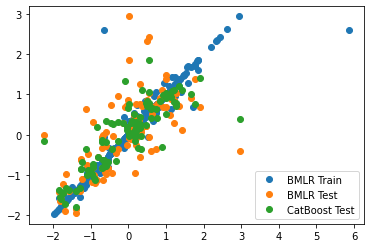

In [18]:
plt.plot(y_train, opt_model_bmlr.predict(X_train), 'o', label='BMLR Train')
plt.plot(y_test, opt_model_bmlr.predict(X_test), 'o', label='BMLR Test')
plt.plot(y_test, opt_pred_cb, 'o', label='CatBoost Test')
plt.legend()

In [24]:
import joblib
joblib.dump(model_rf, 'realestate_rf.joblib')
joblib.dump(model_svr, 'realestate_svr.joblib')
joblib.dump(model_cb, 'realestate_cb.joblib')
joblib.dump(model_bmlr, 'realestate_mbrf.joblib')

['joblib_mbrf.joblib']